<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20602/Data_602_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the data

diabetes_df=pd.read_csv("https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/data_files_DATA602/diabetes2.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


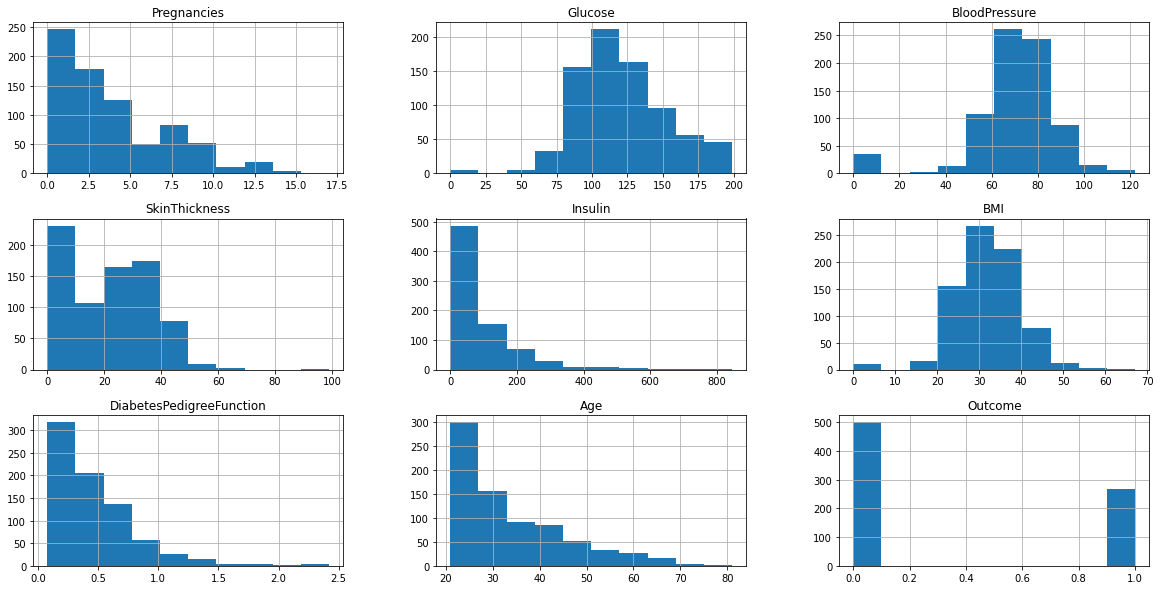

In [7]:
#Plotting the histograms of the variables

diabetes_df.hist(figsize=(20,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


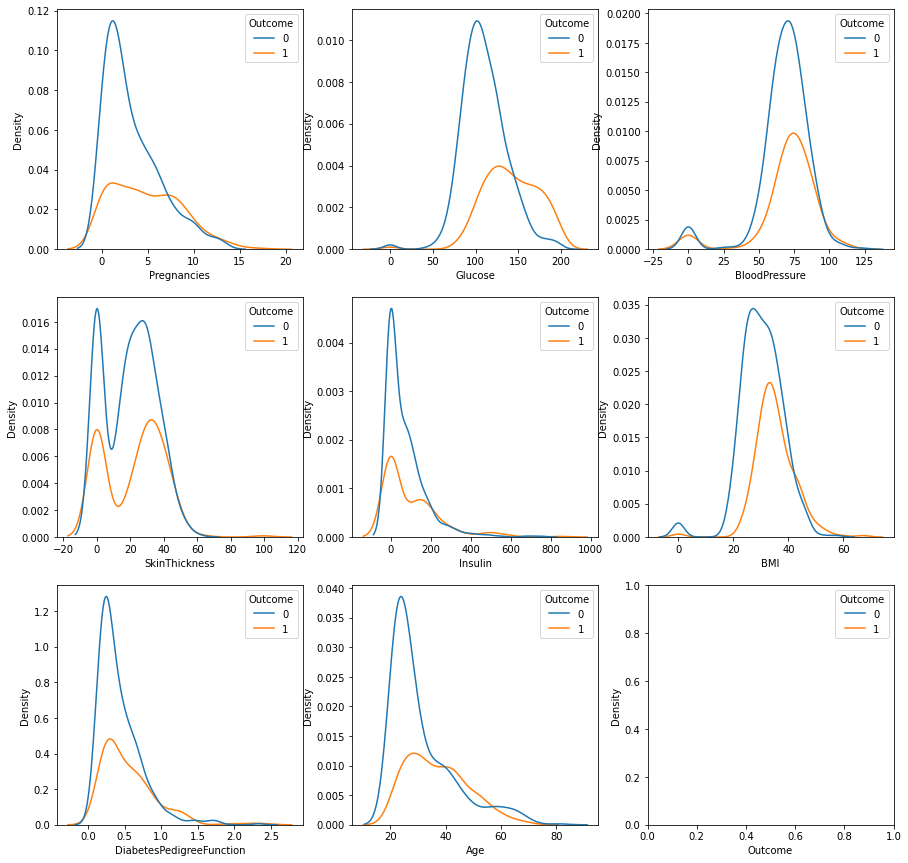

In [8]:
#Plotting the density plots in a subplot of 3x3
#0 represents no diabetes
#1 represents diabetes

plt.subplots(3,3,figsize=(15,15))

plt.subplot(3,3,1)
sns.kdeplot(data=diabetes_df,x="Pregnancies",hue="Outcome")

plt.subplot(3,3,2)
sns.kdeplot(data=diabetes_df,x="Glucose",hue="Outcome")

plt.subplot(3,3,3)
sns.kdeplot(data=diabetes_df,x="BloodPressure",hue="Outcome")

plt.subplot(3,3,4)
sns.kdeplot(data=diabetes_df,x="SkinThickness",hue="Outcome")

plt.subplot(3,3,5)
sns.kdeplot(data=diabetes_df,x="Insulin",hue="Outcome")

plt.subplot(3,3,6)
sns.kdeplot(data=diabetes_df,x="BMI",hue="Outcome")

plt.subplot(3,3,7)
sns.kdeplot(data=diabetes_df,x="DiabetesPedigreeFunction",hue="Outcome")

plt.subplot(3,3,8)
sns.kdeplot(data=diabetes_df,x="Age",hue="Outcome")

plt.subplot(3,3,9)
sns.kdeplot(data=diabetes_df,x="Outcome",hue="Outcome")

#plt.subplot(3,3,9).set_visible(False)

In [9]:
print(diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
#Getting the count of null values in each column

for col_name in diabetes_df:
  col_names=diabetes_df[col_name]
  count=(col_names==0).sum()
  print('Count of zeros in column', col_name,'is:',count)

Count of zeros in column Pregnancies is: 111
Count of zeros in column Glucose is: 5
Count of zeros in column BloodPressure is: 35
Count of zeros in column SkinThickness is: 227
Count of zeros in column Insulin is: 374
Count of zeros in column BMI is: 11
Count of zeros in column DiabetesPedigreeFunction is: 0
Count of zeros in column Age is: 0
Count of zeros in column Outcome is: 500


In [11]:
#Replacing the null values with nan

diabetes_df['Glucose']=diabetes_df['Glucose'].replace(0, np.nan)
diabetes_df['BloodPressure']=diabetes_df['BloodPressure'].replace(0,np.nan)
diabetes_df['SkinThickness']=diabetes_df['SkinThickness'].replace(0,np.nan)
diabetes_df['Insulin']=diabetes_df['Insulin'].replace(0,np.nan)
diabetes_df['BMI']=diabetes_df['BMI'].replace(0,np.nan)

In [12]:
#We can see that the above columns don't contain null values now

for col_name in diabetes_df:
  col_names=diabetes_df[col_name]
  count=(col_names==0).sum()
  print('Count of zeros in column', col_name,'is:',count)

Count of zeros in column Pregnancies is: 111
Count of zeros in column Glucose is: 0
Count of zeros in column BloodPressure is: 0
Count of zeros in column SkinThickness is: 0
Count of zeros in column Insulin is: 0
Count of zeros in column BMI is: 0
Count of zeros in column DiabetesPedigreeFunction is: 0
Count of zeros in column Age is: 0
Count of zeros in column Outcome is: 500


In [13]:
#Replacing the nan values with the mean of each column

diabetes_df['Glucose']=diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean())
diabetes_df['BloodPressure']=diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean())
diabetes_df['SkinThickness']=diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].mean())
diabetes_df['Insulin']=diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].mean())
diabetes_df['BMI']=diabetes_df['BMI'].fillna(diabetes_df['BMI'].mean())

In [14]:
#Standardizing the data

from sklearn import preprocessing

In [15]:
df_scaled= preprocessing.scale(diabetes_df)

In [16]:
df_scaled=pd.DataFrame(df_scaled,columns=diabetes_df.columns)

In [17]:
df_scaled['Outcome']=diabetes_df['Outcome']
diabetes_df=df_scaled

In [18]:
#having a look at the mean, std. deviation and max values

diabetes_df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-1.14,-2.55,-4.00,-2.52,-1.67,-2.08,-1.19,-1.04,0.00
25%,-0.84,-0.72,-0.70,-0.47,-0.40,-0.72,-0.69,-0.79,0.00
50%,-0.25,-0.15,-0.02,0.00,-0.00,-0.01,-0.30,-0.36,0.00
75%,0.64,0.61,0.63,0.32,-0.00,0.60,0.47,0.66,1.00
max,3.91,2.54,4.10,7.95,8.13,5.04,5.88,4.06,1.00


In [19]:
X = diabetes_df.loc[:, diabetes_df.columns != 'Outcome']
y = diabetes_df.loc[:,'Outcome']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [21]:

from keras.models import Sequential
from keras.layers import Dense

mlp_model=Sequential()

In [22]:
#Adding the first, second and output hidden layer

mlp_model.add(Dense(32,activation='relu',input_dim=8))
mlp_model.add(Dense(16,activation='relu'))
mlp_model.add(Dense(1,activation='sigmoid'))

In [23]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

Entropy is the number of bits required to transmit a randomly selected event from a probability distribution. A skewed distribution has a low entropy, whereas a distribution where events have equal probability has a larger entropy.

Cross entropy is the measure of the difference between two probablity distributions for a given random variable or set of events. In this notebook we are using binary cross entropy as our loss function as we are deciding on a binary classification problem.

In [24]:

#Fitting the model with epoch=100
mlp_model.fit(X_train, Y_train,epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6713 - accuracy: 0.6110
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.6782
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.6925
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7210
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7475
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7556
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7678
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7658
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.7760
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.7902
Epoch 11/

In [25]:
acc_score=mlp_model.evaluate(X_train, Y_train)
print("Training Accuracy:",acc_score)
acc_score=mlp_model.evaluate(X_test, Y_test)
print("Training Accuracy:",acc_score)

16/16 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8737
Training Accuracy: [0.28868141770362854, 0.8737270832061768]
5/5 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7597
Training Accuracy: [0.43406349420547485, 0.7597402334213257]


In [26]:
#Fitting the model with epoch=200
mlp_model.fit(X_train, Y_train,epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8676
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8819
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.8758
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8737
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.8717
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8798
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 0.2853 - accuracy: 0.8758
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.8839
Epoch 9/200
16/16 [==============================] - 0s 3ms/step - loss: 0.2813 - accuracy: 0.8880
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8880
Epoch 11/

In [27]:
acc_score=mlp_model.evaluate(X_train, Y_train)
print("Training Accuracy:", acc_score)
acc_score=mlp_model.evaluate(X_test, Y_test)
print("Training Accuracy:",acc_score)

16/16 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9695
Training Accuracy: [0.12315236777067184, 0.9694501161575317]
5/5 [==============================] - 0s 5ms/step - loss: 0.7320 - accuracy: 0.7273
Training Accuracy: [0.7319919466972351, 0.7272727489471436]


<h3>What is the outcome of 100 and 200 epochs? Any difference? Explain.</h3>

From the above observations we can see that as we increase the number of epochs from 100 to 200, the loss goes down and the accuracy increases.

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_pred=(mlp_model.predict(X_test)>0.5).astype("int32")

In [30]:
conf_matrix=confusion_matrix(Y_test,y_pred)

Text(33.0, 0.5, 'Actual')

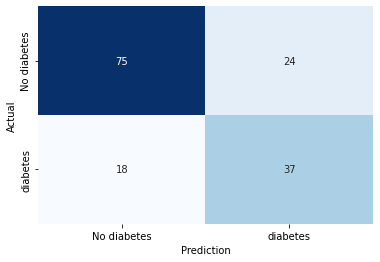

In [31]:
#Plotting the confusion matrix

heat_m=sns.heatmap(conf_matrix,
                   annot=True,
                   xticklabels=['No diabetes','diabetes'],
                   yticklabels=['No diabetes','diabetes'],
                   cbar=False,
                   cmap="Blues"
                   )
heat_m.set_xlabel("Prediction")
heat_m.set_ylabel("Actual")
#plt.show()

- From the above confusion matrix we can see thar most predictions are true negatives and true positives.
- A false negative indicates that a patient will not develop diabetes within the next 5 year, which is completely opoosite of the truth.
- Hence, we would prefer a model with low false negatives.

In [32]:
from sklearn.metrics import roc_curve

In [33]:
y_test_pred=mlp_model.predict(X_test)

Text(0, 0.5, 'True positive rate')

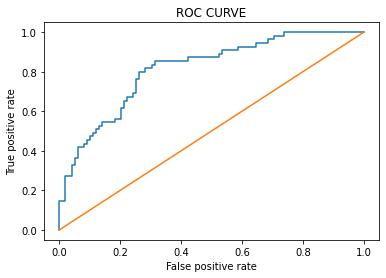

In [34]:
#Plotting the ROC curve

FPR, TPR,_=roc_curve(Y_test,y_test_pred)

plt.plot(FPR,TPR)
plt.plot([0,1],[0,1])
plt.title("ROC CURVE")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

#### What is the area under the curve? What are your conclusions?

From the above ROC curve we can say that the model performs well as it matches the ideal ROC curve. The AUC is higher which indicates that the model is better at differentiating the classes 

In [35]:
pip install pycaret

In [36]:
from pycaret.classification import *

clf1 = setup(data = diabetes_df, target = 'Outcome')
# return best model
best = compare_models()
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)
# return best model based on AUC
best = compare_models() #default is 'Accuracy'
# compare specific models
best_specific = compare_models(include = ['lr','rf','mlp'])
# blacklist certain models
best_specific = compare_models(exclude = ['svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7672,0.8315,0.5582,0.7276,0.6236,0.4605,0.4740,0.021
lda,Linear Discriminant Analysis,0.7653,0.8332,0.5582,0.7228,0.6217,0.4569,0.4700,0.017
ridge,Ridge Classifier,0.7635,0.0000,0.5477,0.7229,0.6148,0.4503,0.4643,0.016
et,Extra Trees Classifier,0.7599,0.8213,0.5705,0.6928,0.6189,0.4482,0.4569,0.470
nb,Naive Bayes,0.7579,0.8105,0.6067,0.6833,0.6337,0.4553,0.4634,0.017
qda,Quadratic Discriminant Analysis,0.7542,0.7993,0.5535,0.6968,0.6082,0.4341,0.4453,0.016
ada,Ada Boost Classifier,0.7526,0.8176,0.6073,0.6639,0.6321,0.4468,0.4493,0.110
rf,Random Forest Classifier,0.7487,0.8187,0.5854,0.6718,0.6192,0.4341,0.4408,0.519
lightgbm,Light Gradient Boosting Machine,0.7469,0.8019,0.6123,0.6524,0.6275,0.4369,0.4407,0.050
gbc,Gradient Boosting Classifier,0.7432,0.8252,0.5751,0.6609,0.6088,0.4203,0.4269,0.120


- Comparing the accuracy of MLP and Logistic regression we can see that the accuracy of MLP on the test data is lower than that of Logistic Regression.Tuning the MLP classifier can help us produce better results and potentially outperform Logistic Regression.
- Comparing the accuracy of Random Forest model from the above table with MLP we can see thatr Random Forest offers slightly better accuracy of 74% incomparison to MLP which offers 72%

